In [2]:
# Excercise 1 - Create your own regression dataset and build fit a model to it.
import pandas as pd
import tensorflow as tf

dataset = pd.read_csv("Admission_Predict.csv")
dataset = dataset.drop("Serial No.", axis=1)
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"])
)

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [6]:
# Excercise 2 - Building a neural network with 4 Dense layers and fitting it to your own regression dataset
tf.random.set_seed(42)

model_01 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
])
model_01.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.legacy.Adam(),
                    metrics=["mae"])
history = model_01.fit(X_train_normal, y_train, epochs=100, verbose=0)
print("done")

done


In [7]:
model_01.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 774us/step - loss: 0.0455 - mae: 0.0455


[0.045525625348091125, 0.045525625348091125]

Text(0.5, 0, 'epochs')

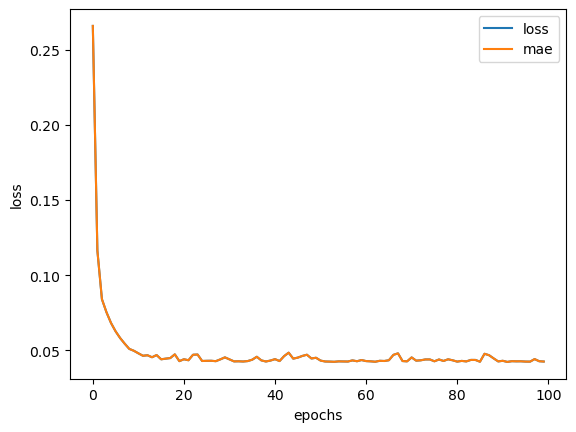

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [11]:
X_train_normal.shape

(400, 6)

In [13]:
# Excercise 3 - Try and improve the results we got on the insurance dataset.
tf.random.set_seed(42)

model_01_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
])
model_01_2.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.legacy.Adam(),
                    metrics=["mae"])
history_2 = model_01_2.fit(X_train_normal, y_train, epochs=80, verbose=0)
print("done")

done


In [14]:
model_01_2.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.0445 - mae: 0.0445


[0.0445190966129303, 0.0445190966129303]

Text(0.5, 0, 'epochs')

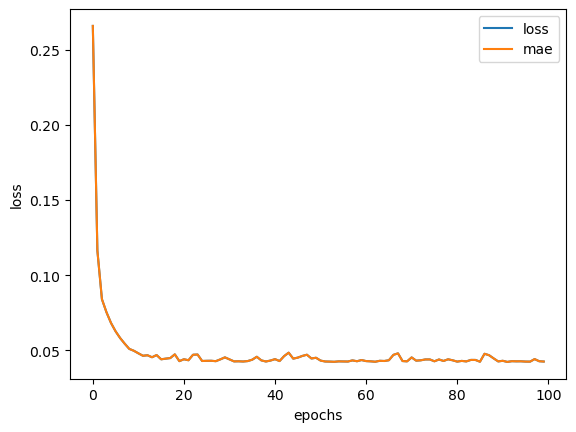

In [15]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [16]:
# Excercise 4 - Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.
Boston_train, Boston_test = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
Xboston_train = Boston_train[0]
yboston_train = Boston_train[1]
Xboston_test = Boston_test[0]
yboston_test = Boston_test[1]
Xboston_train.shape, yboston_train.shape, Xboston_test.shape, yboston_test.shape

57026/57026 [==============================] - 0s 1us/step


((404, 13), (404,), (102, 13), (102,))

In [17]:
tf.random.set_seed(42)

model_Boston = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
])
model_Boston.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.legacy.Adam(),
                    metrics=["mae"])
Boston_history = model_Boston.fit(X_train_normal, y_train, epochs=100, verbose=0)
print("done")

done


In [18]:
model_Boston.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 942us/step - loss: 0.0449 - mae: 0.0449


[0.04486846923828125, 0.04486846923828125]